# Projet  PIMA classification (ML)


### Bibliothéques

In [24]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Fichier Data PIMA

In [14]:
pm=pd.read_csv('c:/Users/Dell/Desktop/Intratnet_plateforme/Pima ML/diabetes.csv')
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
pm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
pm.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

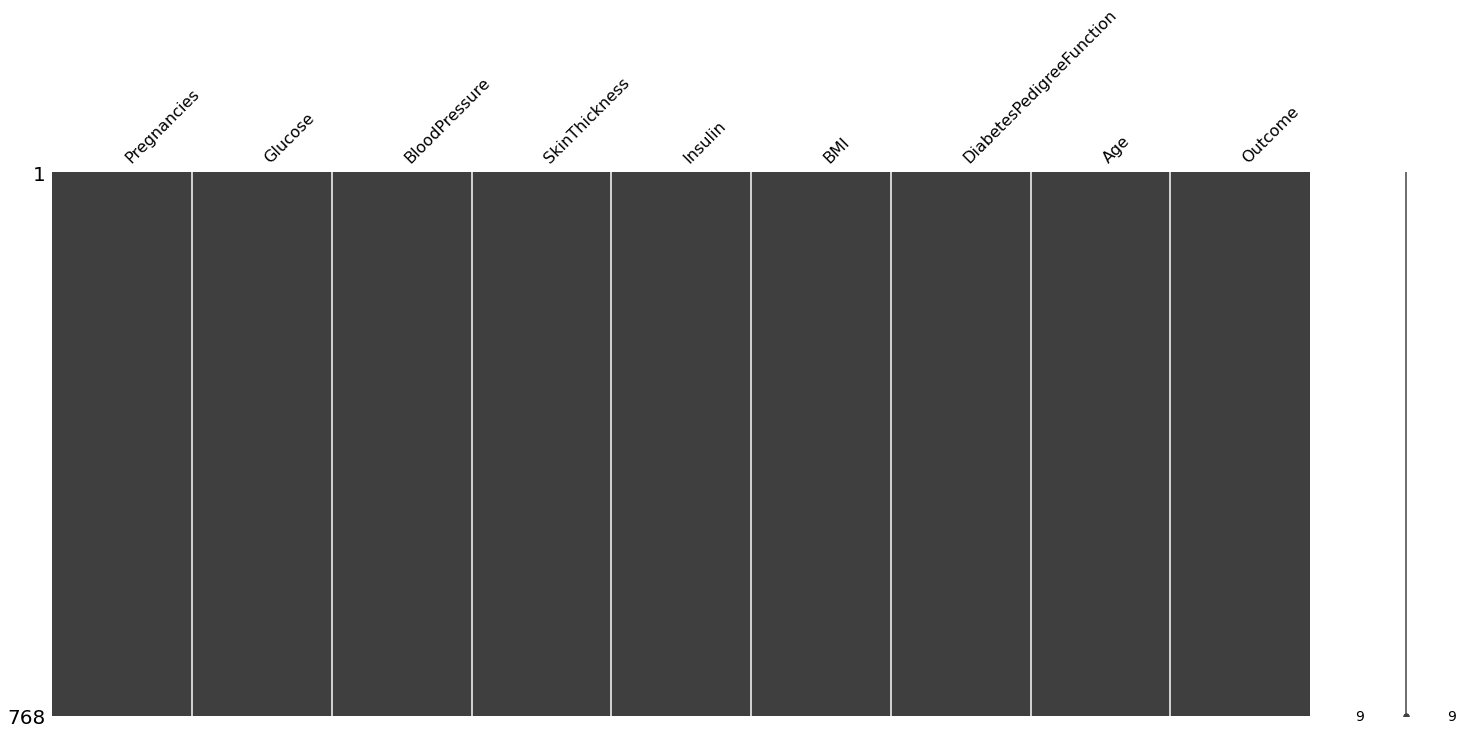

In [25]:
msno.matrix(pm)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

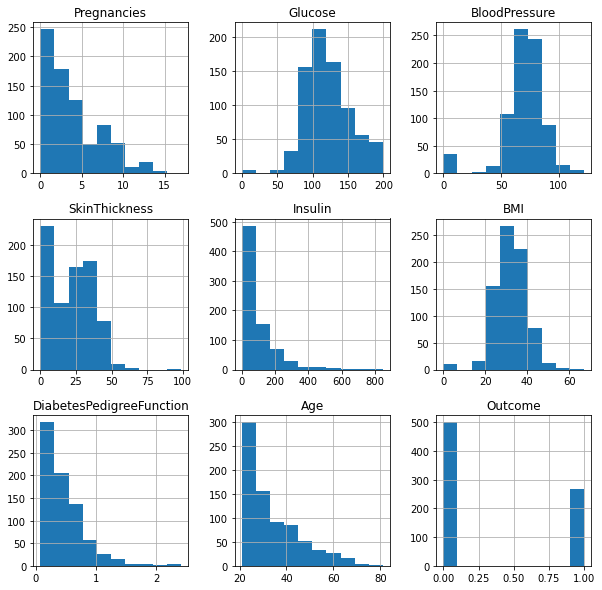

In [22]:
pm.hist(figsize=(10,10))

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

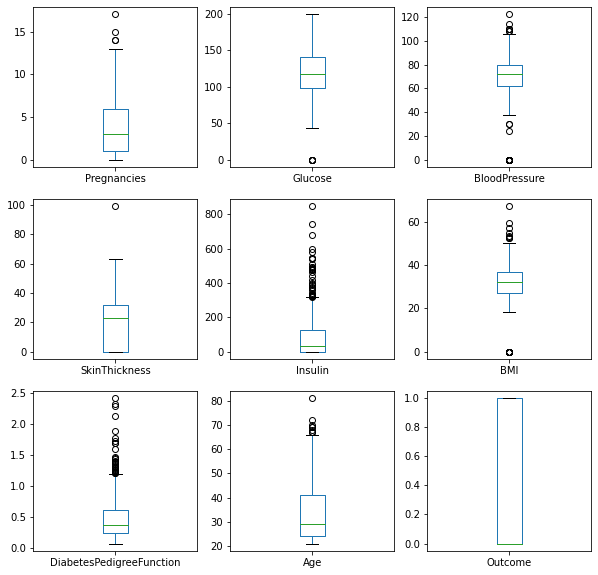

In [32]:
pm.plot(kind= 'box' , subplots=True,layout=(3,3), figsize=(10,10))

In [36]:
pm.groupby("Outcome").size()


Outcome
0    500
1    268
dtype: int64

### Partie Machine learing (apprentissage supervisé) 
### 1) pré-triatement des données

In [56]:
# " division des données avec ""trian et test set"" afin de facilité la tache pour les models de classification"

from sklearn.model_selection import train_test_split

features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

X = pm[features_cols].values      # Predictor feature (8 colonnes)
Y = pm[predicted_class]. values   # Predicted class (1 colonne)
split_test_size = 0.20 ## 20% de test et 80% de train

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=split_test_size, random_state=42)


### 2) Models de classification 
### Random forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

pim_model = RandomForestClassifier(random_state=42)
pim_model.fit(x_train, y_train.ravel())

RandomForestClassifier(random_state=42)

In [63]:
pim_train_predict = pim_model.predict(x_train)
print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_train, pim_train_predict)))

Model Accuracy: 1.00


In [61]:
pim_test_predict = pim_model.predict(x_test)
print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, pim_test_predict)))

Model Accuracy: 0.72


In [62]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, pim_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, pim_test_predict, labels=[1, 0]))

Confusion Matrix
[[34 21]
 [22 77]]

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.62      0.61        55
           0       0.79      0.78      0.78        99

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



### Model regerssion logistique

In [55]:
from sklearn.linear_model import LogisticRegression

pm_lr_model = LogisticRegression(C=0.7, random_state=52)
pm_lr_model.fit(x_train, y_train.ravel())
pm_test_predict = pm_lr_model.predict(x_test)

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, pm_test_predict)))
print("")
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, pm_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, pm_test_predict, labels=[1, 0]))

Model Accuracy: 0.78

Confusion Matrix
[[33 21]
 [13 87]]

Classification Report
              precision    recall  f1-score   support

           1       0.72      0.61      0.66        54
           0       0.81      0.87      0.84       100

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree (sans visualisation de la décision "avec pydotplus")

In [68]:
from sklearn.tree import DecisionTreeClassifier

pm_tree = DecisionTreeClassifier()
pm_tree = pm_tree.fit(x_train,y_train)
pm_tree_pred = pm_tree.predict(x_test)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, pm_tree_pred))

Accuracy: 0.7467532467532467


### xgboost

In [81]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [82]:
boost = XGBClassifier()
boost.fit(x_train,y_train)
pm_boost = boost.predict(x_test)
#print ("Score Train -->", round(boost.score(x_train,y_train) *100,2), " %")

[00:26:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [83]:
accuracy_score(y_test, pm_boost)

0.6883116883116883

In [84]:
boost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)